In [32]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, InputLayer, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [17]:
TRAIN_SIZE = 0.8
FEATURE_SIZE = 13
EPOCHS = 10
BATCH_SIZE = 128

**CRIM** - per capita crime rate by town  
**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.  
**INDUS** - proportion of non-retail business acres per town  
**CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
**NOX** - nitric oxides concentration (parts per 10 million)  
**RM** - average number of rooms per dwelling  
**AGE** - proportion of owner-occupied units built prior to 1940  
**DIS** - weighted distances to five Boston employment centres  
**RAD** - index of accessibility to radial highways  
**TAX** - full-value property-tax rate per \$10,000   
**PTRATIO** - pupil-teacher ratio by town  
**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
**LSTAT** - \% lower status of the population  
**MEDV** - Median value of owner-occupied homes in $1000’s  
  
**ROW** - 506  
**COL** - 14 (including target)

In [18]:
dataset = datasets.load_boston()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['target'] = dataset['target']

In [19]:
df_train, df_test = train_test_split(df, test_size=(1-TRAIN_SIZE), random_state=42)

In [20]:
df_train.target

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: target, Length: 404, dtype: float64

In [21]:
x_train = df_train.drop(columns='target').values
x_test = df_test.drop(columns='target').values

x_train = x_train.reshape(-1,13,1)
x_test = x_test.reshape(-1,13,1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (404, 13, 1)
x_test (102, 13, 1)


In [22]:
y_train = df_train.target.values
y_test = df_test.target.values

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


print("y_train",y_train.shape)
print("y_test",y_test.shape)


y_train (404, 1)
y_test (102, 1)


In [23]:
x_train.shape[1:]

(13, 1)

In [24]:
y_train

array([[12. ],
       [19.9],
       [19.4],
       [13.4],
       [18.2],
       [24.6],
       [21.1],
       [24.7],
       [ 8.7],
       [27.5],
       [20.7],
       [36.2],
       [31.6],
       [11.7],
       [39.8],
       [13.9],
       [21.8],
       [23.7],
       [17.6],
       [24.4],
       [ 8.8],
       [19.2],
       [25.3],
       [20.4],
       [23.1],
       [37.9],
       [15.6],
       [45.4],
       [15.7],
       [22.6],
       [14.5],
       [18.7],
       [17.8],
       [16.1],
       [20.6],
       [31.6],
       [29.1],
       [15.6],
       [17.5],
       [22.5],
       [19.4],
       [19.3],
       [ 8.5],
       [20.6],
       [17. ],
       [17.1],
       [14.5],
       [50. ],
       [14.3],
       [12.6],
       [28.7],
       [21.2],
       [19.3],
       [23.1],
       [19.1],
       [25. ],
       [33.4],
       [ 5. ],
       [29.6],
       [18.7],
       [21.7],
       [23.1],
       [22.8],
       [21. ],
       [48.8],
       [14.6],
       [16

In [25]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1:])))
model.add(Dropout(0.5))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))

In [26]:
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['mse'])

In [27]:
# callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
#               EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 13, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1)

Train on 363 samples, validate on 41 samples
Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 588.9342 - mse: 588.9342 - val_loss: 566.1251 - val_mse: 566.1251
Epoch 2/10
363/363 [==============================] - 0s 62us/step - loss: 588.7786 - mse: 588.7786 - val_loss: 564.7464 - val_mse: 564.7464
Epoch 3/10
363/363 [==============================] - 0s 84us/step - loss: 585.8534 - mse: 585.8534 - val_loss: 563.3355 - val_mse: 563.3355
Epoch 4/10
363/363 [==============================] - 0s 85us/step - loss: 586.2701 - mse: 586.2701 - val_loss: 561.9026 - val_mse: 561.9026
Epoch 5/10
363/363 [==============================] - 0s 76us/step - loss: 584.8310 - mse: 584.8310 - val_loss: 560.4365 - val_mse: 560.4365
Epoch 6/10
363/363 [==============================] - 0s 72us/step - loss: 582.8732 - mse: 582.8732 - val_loss: 558.9225 - val_mse: 558.9225
Epoch 7/10
363/363 [==============================] - 0s 86us/step - loss: 582.0021 - mse: 582.0021 - val_loss

In [30]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("MSE:",score[1])


102/102 [==============================] - 0s 26us/step
MSE: 491.2343444824219
CPU times: user 8.91 ms, sys: 63 µs, total: 8.97 ms
Wall time: 6.94 ms


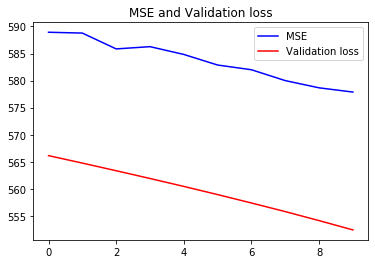

In [34]:
mse = history.history['mse']
val_loss = history.history['val_loss']
 
epochs = range(len(mse))
 
plt.plot(epochs, mse, 'b', label='MSE')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('MSE and Validation loss')
plt.legend()
 
plt.show()